# 1. Multimodal Analysis of Texts using Sentence Embeddings and Dimensionality Reduction Techniques

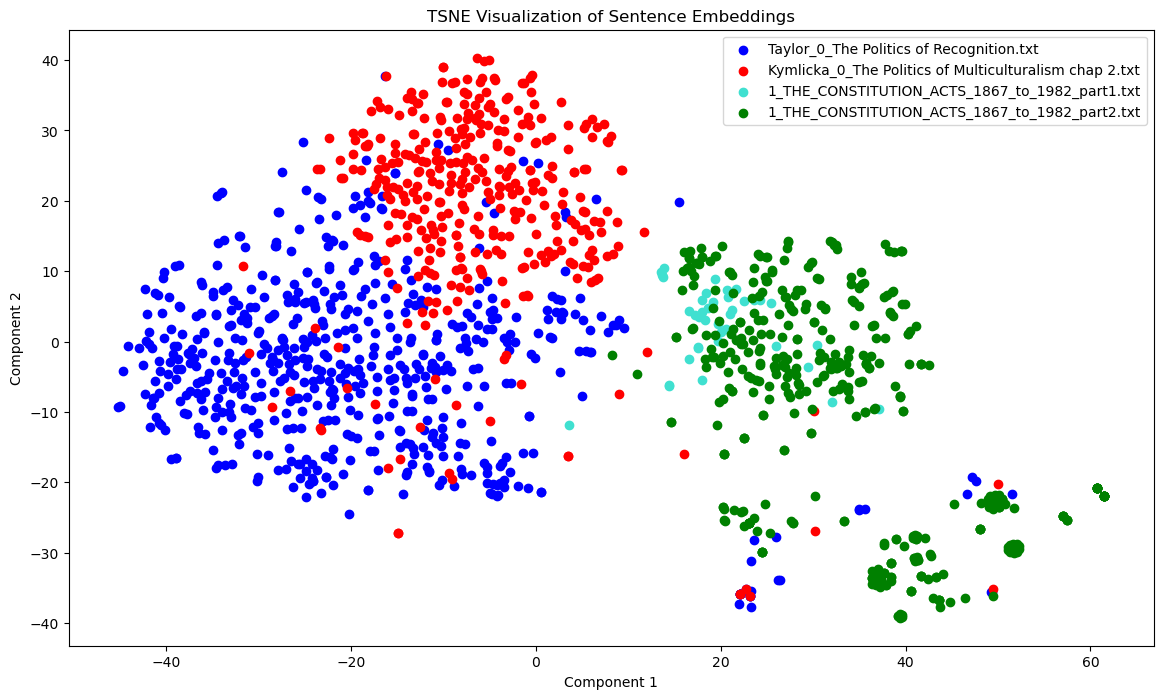

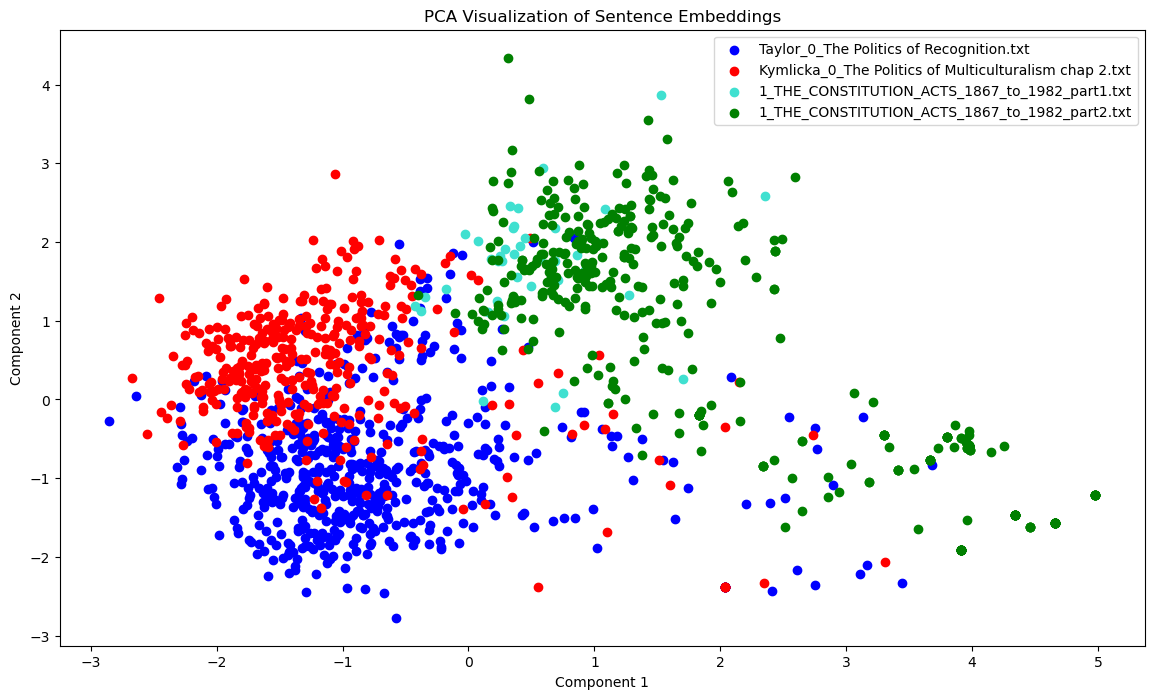

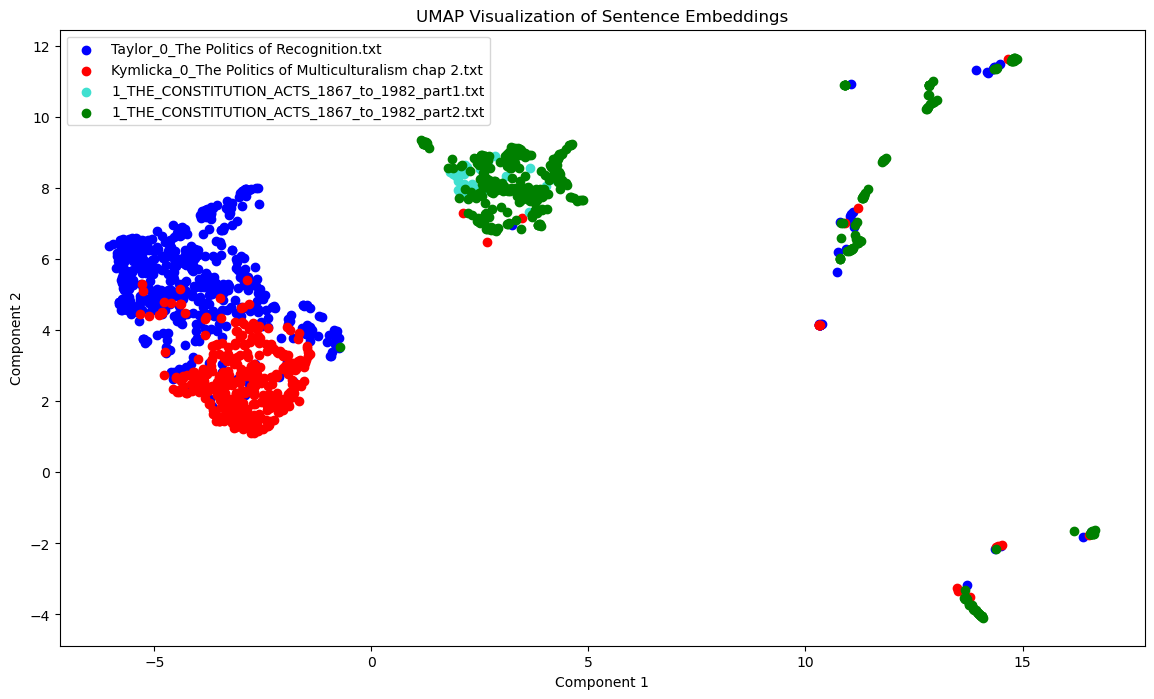

In [4]:
import os
import pickle
from sentence_transformers import SentenceTransformer
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import umap

# Load the model
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

# Directory and file setup
directory = "/Users/mahdi/Library/CloudStorage/OneDrive-UniversityofToronto/DomainsNew/"
input_files = [
    "Taylor_0_The Politics of Recognition.txt",
    "Kymlicka_0_The Politics of Multiculturalism chap 2.txt",
    "1_THE_CONSTITUTION_ACTS_1867_to_1982_part1.txt",
    "1_THE_CONSTITUTION_ACTS_1867_to_1982_part2.txt",
]

# Function to process text files
def process_text_files(directory, file_list):
    sentences = []
    file_indices = []  # Keep the index of the file each sentence is from.
    for file_index, file in enumerate(file_list):
        with open(os.path.join(directory, file), 'r', encoding='utf-8') as f:
            text = f.read()

        # Split text into sentences
        file_sentences = text.split('. ')
        sentences.extend(file_sentences)
        file_indices.extend([file_index] * len(file_sentences))

    return sentences, file_indices

# Read and process the input files
sentences, file_indices = process_text_files(directory, input_files)

# Encode the sentences to get the embeddings
embeddings = model.encode(sentences)

# Save the embeddings for later use
embeddings_file = os.path.join(directory, "embeddings.pkl")
with open(embeddings_file, "wb") as f:
    pickle.dump(embeddings, f)

# Function for dimensionality reduction and visualization
def plot_embeddings(embeddings, file_indices, method='TSNE', title='2D Visualization of Sentence Embeddings'):
    if method == 'TSNE':
        reducer = TSNE(n_components=2, random_state=42)
    elif method == 'PCA':
        reducer = PCA(n_components=2)
    elif method == 'UMAP':
        reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, metric='correlation')

    # Reduce the dimensions
    embeddings_reduced = reducer.fit_transform(embeddings)

    # Plotting
    plt.figure(figsize=(14, 8))
    colors = ['blue', 'red', 'turquoise', 'green']
    unique_labels = set()
    for index, (x, y) in enumerate(embeddings_reduced):
        file_index = file_indices[index]
        label = input_files[file_index] if file_index not in unique_labels else ""
        if label:
            unique_labels.add(file_index)
        plt.scatter(x, y, color=colors[file_index], label=label)

    plt.title(title)
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.legend()
    plt.show()

# Perform dimensionality reduction and visualization for TSNE, PCA, and UMAP
plot_embeddings(embeddings, file_indices, method='TSNE', title='TSNE Visualization of Sentence Embeddings')
plot_embeddings(embeddings, file_indices, method='PCA', title='PCA Visualization of Sentence Embeddings')
plot_embeddings(embeddings, file_indices, method='UMAP', title='UMAP Visualization of Sentence Embeddings')

In [ ]:
Saving sentences to a text file

In [6]:
# Saving sentences to a text file organized by their original text file
def save_sentences_by_file(sentences, file_indices, input_files, directory, filename="sentences_by_file.txt"):
    # Create a dictionary to hold sentences by file
    sentences_by_file = {file: [] for file in input_files}
    
    # Append sentences to the correct file list
    for sentence, file_index in zip(sentences, file_indices):
        sentences_by_file[input_files[file_index]].append(sentence)
    
    # Write sentences to file
    with open(os.path.join(directory, filename), 'w', encoding='utf-8') as f:
        for file, sentences_list in sentences_by_file.items():
            f.write(f"--- {file} ---\n")
            for sentence in sentences_list:
                f.write(sentence + '\n')
            f.write('\n')

save_sentences_by_file(sentences, file_indices, input_files, directory)

In [10]:
Yes, you can aggregate the embeddings of each text into one representative embedding, such as the mean or the most representative embedding based on a certain criterion (e.g., k-means clustering). Here, I will show you how to compute the mean embedding for each text.

Compute the mean embedding for each text:

In [ ]:
Modify the plot_embeddings() function to accept mean embeddings and visualize them:
Now, you have a visualization of the mean embeddings for each text. The distances between the mean embeddings provide a general representation of the similarities and differences between the corresponding texts.


# 2. Exploring and Visualizing Mean Sentence Embeddings

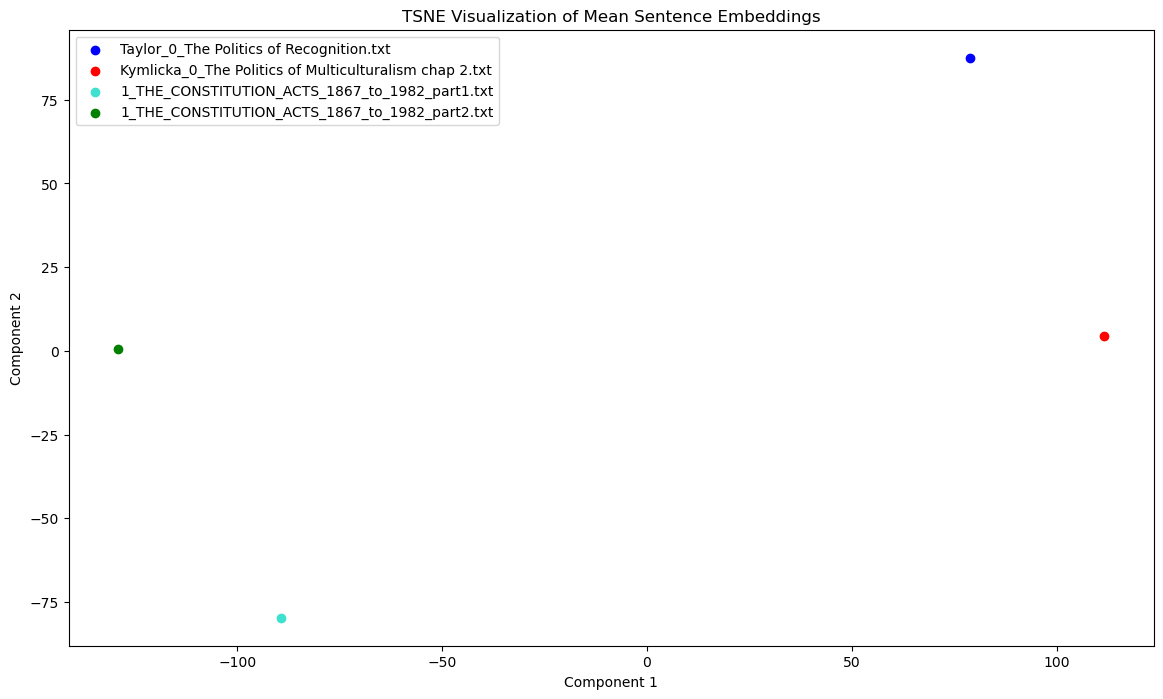

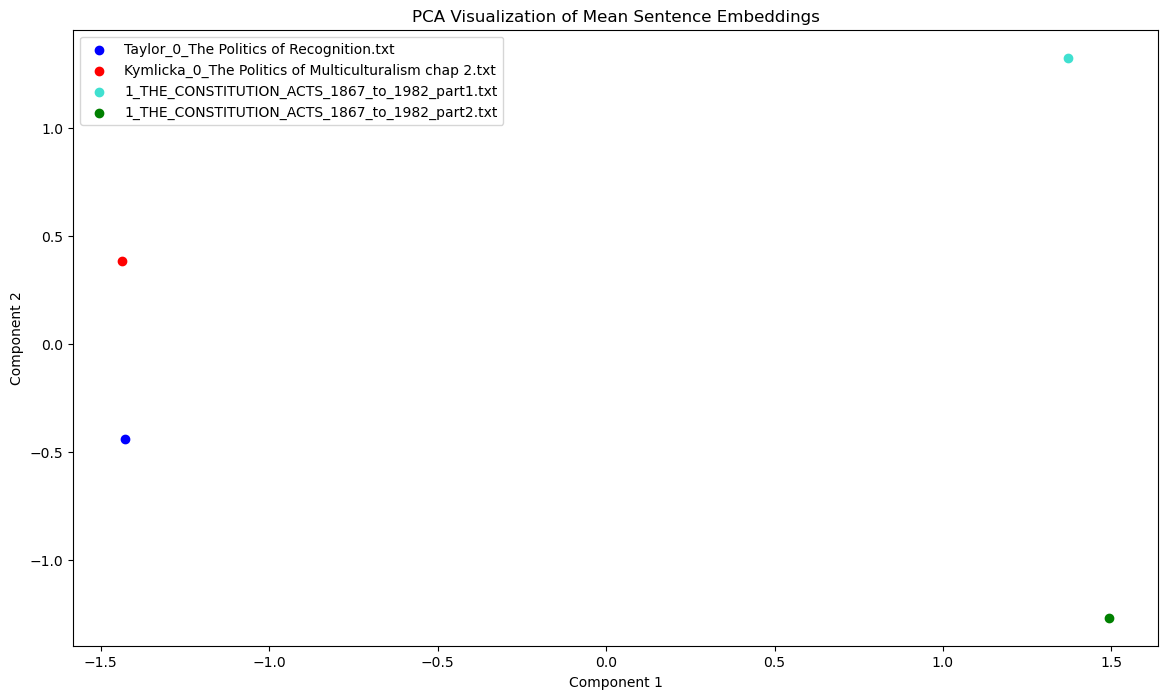

/Users/mahdi/anaconda3/lib/python3.11/site-packages/umap/umap_.py:2433: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


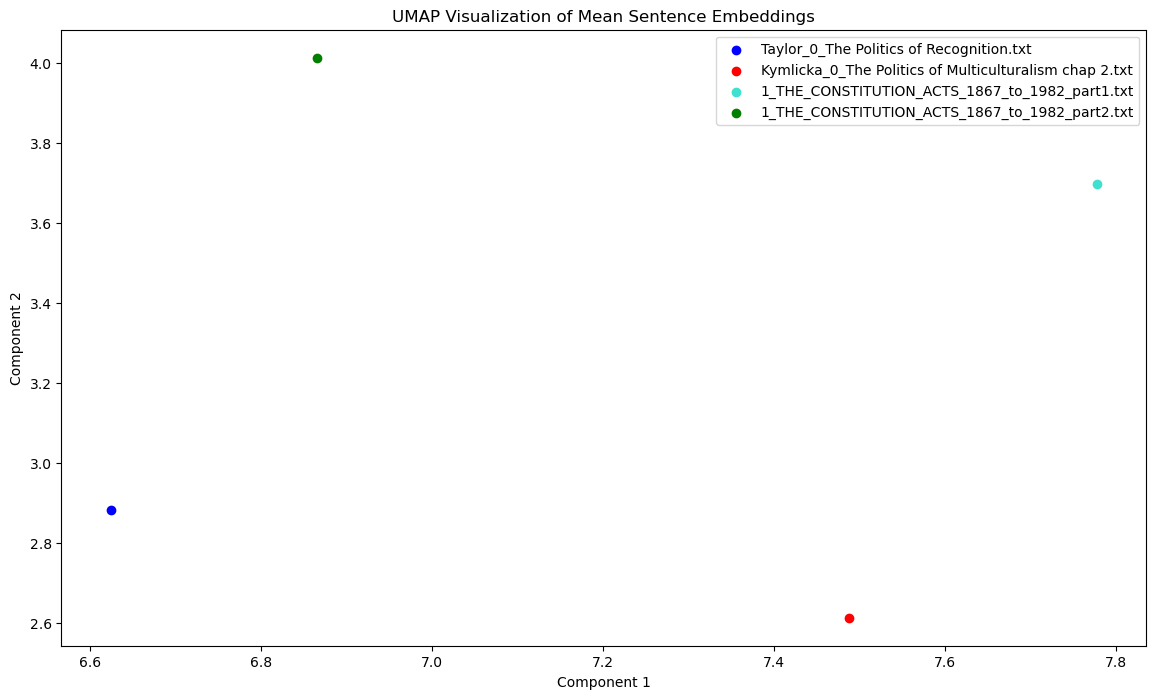

In [14]:
import os
import pickle
from sentence_transformers import SentenceTransformer
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import umap

def plot_embeddings(embeddings, method='TSNE', title='2D Visualization of Mean Sentence Embeddings'):
    if method == 'TSNE':
        reducer = TSNE(n_components=2, random_state=42, perplexity=2)
    elif method == 'PCA':
        reducer = PCA(n_components=2)
    elif method == 'UMAP':
        reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, metric='correlation')

    embeddings_reduced = reducer.fit_transform(embeddings)

    plt.figure(figsize=(14, 8))
    colors = ['blue', 'red', 'turquoise', 'green']
    for index, (x, y) in enumerate(embeddings_reduced):
        plt.scatter(x, y, color=colors[index], label=input_files[index])

    plt.title(title)
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.legend()
    plt.show()

# Load the model
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

# Directory and file setup
directory = "/Users/mahdi/Library/CloudStorage/OneDrive-UniversityofToronto/DomainsNew/"
input_files = [
    "Taylor_0_The Politics of Recognition.txt",
    "Kymlicka_0_The Politics of Multiculturalism chap 2.txt",
    "1_THE_CONSTITUTION_ACTS_1867_to_1982_part1.txt",
    "1_THE_CONSTITUTION_ACTS_1867_to_1982_part2.txt",
]

def process_text_files(directory, file_list):
    sentences = []
    file_indices = []  # Keep the index of the file each sentence is from.
    for file_index, file in enumerate(file_list):
        with open(os.path.join(directory, file), 'r', encoding='utf-8') as f:
            text = f.read()

        # Split text into sentences
        file_sentences = text.split('. ')
        sentences.extend(file_sentences)
        file_indices.extend([file_index] * len(file_sentences))

    return sentences, file_indices

# Read and process the input files
sentences, file_indices = process_text_files(directory, input_files)

# Encode the sentences to get the embeddings
embeddings = model.encode(sentences)

def compute_mean_embedding(embeddings, file_indices):
    unique_file_indices = list(set(file_indices))
    mean_embeddings = []
    for file_index in unique_file_indices:
        indices = [i for i, label in enumerate(file_indices) if label == file_index]
        mean_embeddings.append(np.mean(embeddings[indices], axis=0))
    return np.array(mean_embeddings)

mean_embeddings = compute_mean_embedding(embeddings, file_indices)

# Visualize the mean embeddings using TSNE, PCA, and UMAP
plot_embeddings(mean_embeddings, method='TSNE', title='TSNE Visualization of Mean Sentence Embeddings')
plot_embeddings(mean_embeddings, method='PCA', title='PCA Visualization of Mean Sentence Embeddings')
plot_embeddings(mean_embeddings, method='UMAP', title='UMAP Visualization of Mean Sentence Embeddings')

In [ ]:
This code will now visualize the mean embeddings using k-means clustering instead of TSNE, PCA, and UMAP.

/Users/mahdi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


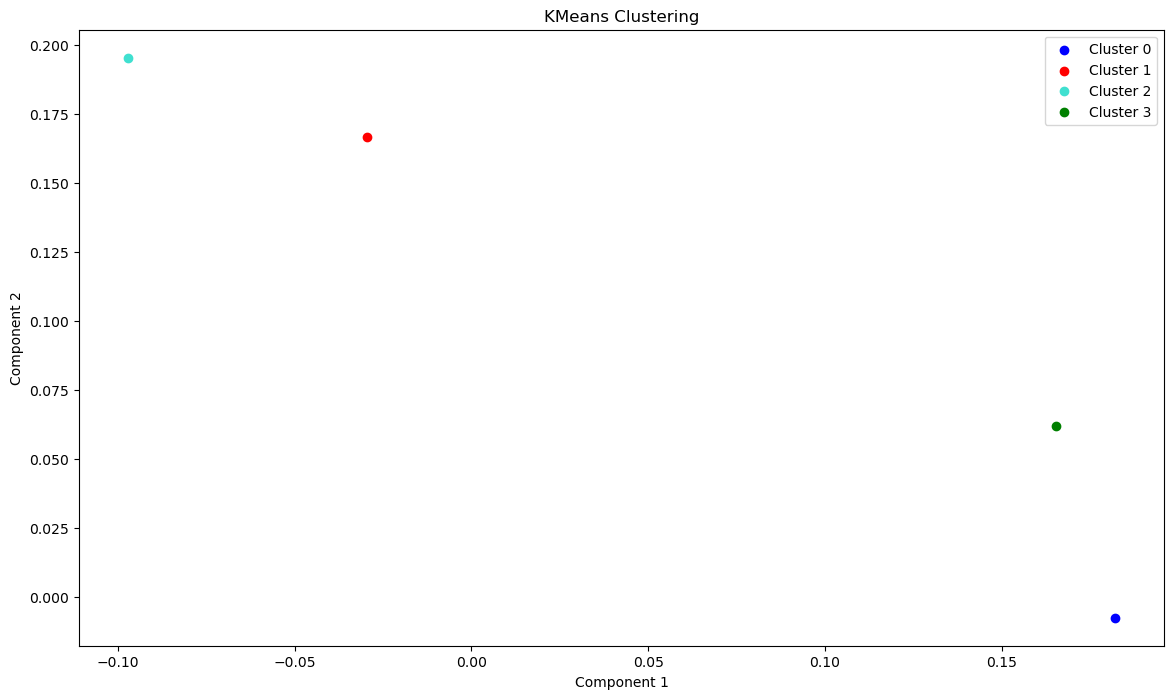

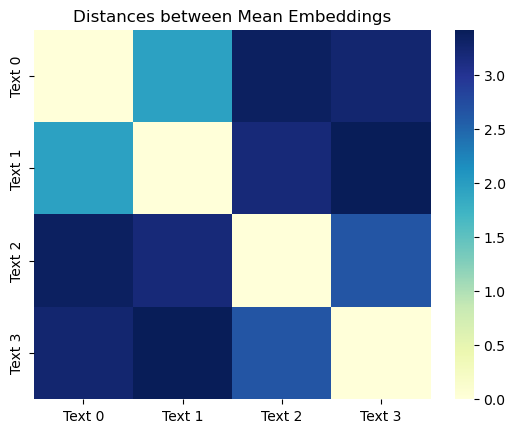

In [16]:
import os
import pickle
from sentence_transformers import SentenceTransformer
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import euclidean_distances
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import umap
import seaborn as sns
import pandas as pd

# Load the model
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

# Directory and file setup
directory = "/Users/mahdi/Library/CloudStorage/OneDrive-UniversityofToronto/DomainsNew/"
input_files = [
    "Taylor_0_The Politics of Recognition.txt",
    "Kymlicka_0_The Politics of Multiculturalism chap 2.txt",
    "1_THE_CONSTITUTION_ACTS_1867_to_1982_part1.txt",
    "1_THE_CONSTITUTION_ACTS_1867_to_1982_part2.txt",
]

def process_text_files(directory, file_list):
    sentences = []
    file_indices = []  # Keep the index of the file each sentence is from.
    for file_index, file in enumerate(file_list):
        with open(os.path.join(directory, file), 'r', encoding='utf-8') as f:
            text = f.read()

        # Split text into sentences
        file_sentences = text.split('. ')
        sentences.extend(file_sentences)
        file_indices.extend([file_index] * len(file_sentences))

    return sentences, file_indices

# Read and process the input files
sentences, file_indices = process_text_files(directory, input_files)

# Encode the sentences to get the embeddings
embeddings = model.encode(sentences)

def compute_mean_embedding(embeddings, file_indices):
    unique_file_indices = list(set(file_indices))
    mean_embeddings = []
    for file_index in unique_file_indices:
        indices = [i for i, label in enumerate(file_indices) if label == file_index]
        mean_embeddings.append(np.mean(embeddings[indices], axis=0))
    return np.array(mean_embeddings)

mean_embeddings = compute_mean_embedding(embeddings, file_indices)

def plot_kmeans_clustering(embeddings, title='KMeans Clustering'):
    kmeans = KMeans(n_clusters=4, random_state=123).fit(embeddings)  # Set the number of clusters to 4
    labels = kmeans.labels_

    plt.figure(figsize=(14, 8))
    colors = ['blue', 'red', 'turquoise', 'green']
    for label in range(4):
        index = [i for i, l in enumerate(labels) if l == label]
        x, y = embeddings[index, 0], embeddings[index, 1]
        plt.scatter(x, y, color=colors[label], label=f'Cluster {label}')

    plt.title(title)
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.legend()
    plt.show()

def plot_distances(mean_embeddings):
    distances = euclidean_distances(mean_embeddings)
    df = pd.DataFrame(distances, columns=[f'Text {i}' for i in range(4)], index=[f'Text {i}' for i in range(4)])
    sns.heatmap(df, cmap='YlGnBu')
    plt.title("Distances between Mean Embeddings")
    plt.show()

# Visualize the mean embeddings using k-means clustering
plot_kmeans_clustering(mean_embeddings)

# Visualize the distances between mean embeddings
plot_distances(mean_embeddings)

# 3. Exploring Mean Sentence Embeddings and Distances

Distance Matrix:
                                                     Taylor_0_The Politics of Recognition.txt  \
Taylor_0_The Politics of Recognition.txt                                            0.000000   
Kymlicka_0_The Politics of Multiculturalism cha...                                  1.950526   
1_THE_CONSTITUTION_ACTS_1867_to_1982_part1.txt                                      3.361062   
1_THE_CONSTITUTION_ACTS_1867_to_1982_part2.txt                                      3.247762   

                                                    Kymlicka_0_The Politics of Multiculturalism chap 2.txt  \
Taylor_0_The Politics of Recognition.txt                                                     1.950526        
Kymlicka_0_The Politics of Multiculturalism cha...                                           0.000000        
1_THE_CONSTITUTION_ACTS_1867_to_1982_part1.txt                                               3.185089        
1_THE_CONSTITUTION_ACTS_1867_to_1982_part2.txt               

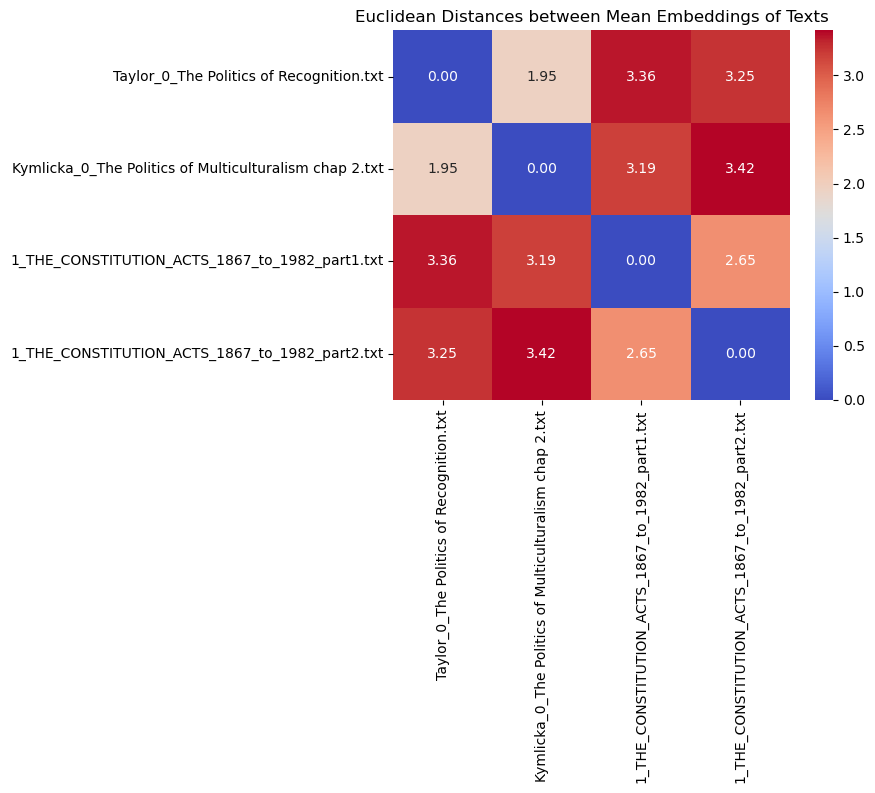

Distance between Taylor_0_The Politics of Recognition.txt and Kymlicka_0_The Politics of Multiculturalism chap 2.txt: 1.95
Distance between Taylor_0_The Politics of Recognition.txt and 1_THE_CONSTITUTION_ACTS_1867_to_1982_part1.txt: 3.36
Distance between Taylor_0_The Politics of Recognition.txt and 1_THE_CONSTITUTION_ACTS_1867_to_1982_part2.txt: 3.25
Distance between Kymlicka_0_The Politics of Multiculturalism chap 2.txt and 1_THE_CONSTITUTION_ACTS_1867_to_1982_part1.txt: 3.19
Distance between Kymlicka_0_The Politics of Multiculturalism chap 2.txt and 1_THE_CONSTITUTION_ACTS_1867_to_1982_part2.txt: 3.42
Distance between 1_THE_CONSTITUTION_ACTS_1867_to_1982_part1.txt and 1_THE_CONSTITUTION_ACTS_1867_to_1982_part2.txt: 2.65


In [19]:
# Additional imports required for these operations
from sklearn.metrics.pairwise import euclidean_distances
import pandas as pd
import seaborn as sns

# Existing functions and code remain the same ...

# Assuming the existing code is placed here ...

def compute_mean_embedding(embeddings, file_indices):
    unique_file_indices = list(set(file_indices))
    mean_embeddings = []
    for file_index in unique_file_indices:
        indices = [i for i, label in enumerate(file_indices) if label == file_index]
        mean_embeddings.append(np.mean(embeddings[indices], axis=0))
    return np.array(mean_embeddings), unique_file_indices

mean_embeddings, unique_file_indices = compute_mean_embedding(embeddings, file_indices)

# Function to calculate and display distances
def display_distances(mean_embeddings, input_files):
    # Calculate euclidean distances between mean embeddings
    distances = euclidean_distances(mean_embeddings)
    
    # Create a DataFrame to better visualize the distances
    distance_df = pd.DataFrame(distances, index=input_files, columns=input_files)
    
    print("Distance Matrix:\n", distance_df)
    
    # Plot heatmap of distances for a more visual interpretation
    sns.heatmap(distance_df, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Euclidean Distances between Mean Embeddings of Texts")
    plt.show()

    # Interpretation of distances in the command line
    for i, file1 in enumerate(input_files):
        for j, file2 in enumerate(input_files):
            if i < j:
                print(f"Distance between {file1} and {file2}: {distances[i][j]:.2f}")

# Visualize the distances between mean embeddings
display_distances(mean_embeddings, input_files)